<a href="https://colab.research.google.com/github/tahio12/omar/blob/master/Data_mining_sonar%20data.%20ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Leader - Omar Tahir - otahi001@gold.ac.uk, 33684350

 Matei-Nicolae Turcu - mturc001@campus.goldsmiths.ac.uk, 3365097301


Here we import the libraries numpy and panda

In [ ]:
import numpy as np
import pandas as pd

This code loads the training data and test data from the CSV files by using the panda library

In [ ]:
# Load training and test data
train_data = pd.read_csv('sonar_train.csv')
test_data = pd.read_csv('sonar_test.csv')

The predictors are separated from the outcome variables in the trainig and test data. Train_x and test_x are storing the predictors, and train_y and test_y are storing the outcome variables.

In [ ]:
# Separate predictors (features) and outcome variable (label)
train_X = train_data.iloc[:, :-1].values
train_y = train_data.iloc[:, -1].values
test_X = test_data.iloc[:, :-1].values
test_y = test_data.iloc[:, -1].values

This piece of code calculates the Minkowski distance between two points x and y using a special parameter p.

In [ ]:
# Define Minkowski distance function
def minkowski_dist(x, y, p):
    return np.power(np.power(np.abs(x - y), p).sum(), 1/p)

The nn_classifier function takes in the training and test data, and a parameter p which determines the type of Minkowski distance to use. In order to forecast the outcome variable based on the predictors, this function uses the nearest neighbour alogirthm.

In [ ]:
# Define nearest neighbour classifier function
def nn_classifier(train_X, train_y, test_X, p):
    preds = []
    for i in range(len(test_X)):
        distances = []
        for j in range(len(train_X)):
            dist = minkowski_dist(test_X[i], train_X[j], p)
            distances.append((dist, train_y[j]))
        distances.sort(key=lambda x: x[0])
        preds.append(distances[0][1])
    return np.array(preds)

The evaluate function takes in the true values of the outcome variable y_true and the predicted values of the outcome variable y_pred. This function calculates the evaluation metrics accuracy, precision, F1 score and recall.

In [ ]:
# Define function to calculate evaluation metrics
def evaluate(y_true, y_pred):
    tp = np.sum((y_true == 'M') & (y_pred == 'M'))
    tn = np.sum((y_true == 'R') & (y_pred == 'R'))
    fp = np.sum((y_true == 'R') & (y_pred == 'M'))
    fn = np.sum((y_true == 'M') & (y_pred == 'R'))
    accuracy = (tp + tn) / len(y_true)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1 = 2 * precision * recall / (precision + recall)
    return accuracy, recall, precision, f1

By using the nn_classifier function the code predicts the outcome variable for both Minkowsi distance for p=1 and p = 2. . The evaluation metrics are calculated using the evaluate function, and the results are printed to the console.

In [ ]:
# Use nearest neighbour classifier with Minkowski distance for p = 1 (Manhattan) and p = 2 (Euclidean)
for p in [1, 2]:
    y_pred = nn_classifier(train_X, train_y, test_X, p)
    acc, rec, prec, f1 = evaluate(test_y, y_pred)
    print(f'Minkowski distance with p = {p} (')
    print(f'Accuracy: {acc:.2f}, Recall: {rec:.2f}, Precision: {prec:.2f}, F1 score: {f1:.2f}')

Minkowski distance with p = 1 (
Accuracy: 0.88, Recall: 0.95, Precision: 0.85, F1 score: 0.90
Minkowski distance with p = 2 (
Accuracy: 0.90, Recall: 0.97, Precision: 0.86, F1 score: 0.91


This code calculates evaluation metrics for different values of q using the nn_classifier function and evaluate. It loops through values of q from 1 to 20, and for each value of q it calculates the prediction for the test and evaluation metrics. The evaluation matrics are accuracy, recall, precision and  F1. 

In [ ]:
# Calculate evaluation metrics for different values of q
q_values = range(1, 21)
results = []
for q in q_values:
    y_pred = nn_classifier(train_X, train_y, test_X, q)
    acc, rec, prec, f1 = evaluate(test_y, y_pred)
    results.append((q, acc, rec, prec, f1))



This code plots 4 graphs showing how the accuracy, recall, precision and F1 are changing with each value of q. For each metric, the line plot shows how the metric changes as the value of q increases. The results list is used to obtain the evaluation metric values for each value of q.
After plotting the graphs, the code determines the best value of q based on accuracy. 
By using the max function, it findss the tuple in results with the highest accuracy value, and it selects the first element which corresponds with the q with the highest accuracy. 

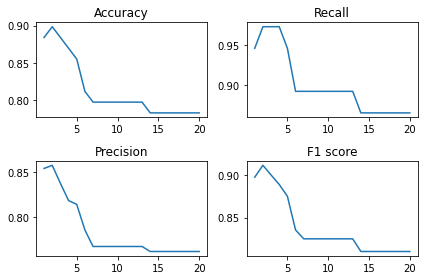

Best value of q based on accuracy: 2


In [ ]:
# Plot evaluation metrics for different values of q
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 score']
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(q_values, [r[i+1] for r in results])
    plt.title(metrics[i])
plt.tight_layout()
plt.show()

# Print best value of q based on accuracy
best_q = max(results, key=lambda x: x[1])[0]
print(f'Best value of q based on accuracy: {best_q}')